In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import sqrt

# Reflecting Prior Class Probabilities
$$P(Y=y)= \begin{cases}
0.0001 & \text{if y=Black} \\ 
0.02 & \text{if y=Red} \\ 
0.979 & \text{if y=Blue}
\end{cases}$$

In [1]:
priors = {1:0.0001, 2:0.02, 3:0.979}

Assuming that you are given an expression for p(x, y), explain how you can achieve the
marginal distributions, p(y) and p(x), as well as the conditional distributions p (y|x) and p (x|y).


1. p(y) can be found by summing over all x's for each y 
2. p(x) can be found by summing over all y's for each x
3. p(y|x) can be found by fixing x at a value, and getting the y-probs
4. p(x|y) can be found by fixing y at a value, and getting the x-probs

### Exercise 3
Imagine that you wish to detect whether a person has cancer (Y = 1) from some continuous
measurement, e.g. a blood marker.

Assume that the class conditionals are normal distributions as

X | Y = 1 ∼ N (3, 2) and X | Y = 2 ∼ N (1, 4)

and that class priors are P(Y = 1) = 0.2 and P(Y = 2) = 0.8.

1. Explain how to find Bayes classifier and illustrate on a plot both the decision regions and the two
functions
gk(x) = p (x|Y = k) P(Y = k), k = 1, 2.
2. Normalise the plot above to show for each value of x the posterior class probabilities P (Y = k|X = x).
3. What is the Bayes error rate, i.e. the misclassification error for the Bayes classifier?
4. How does the classifier change, if instead P(Y = 1) = 0.5?


In [17]:
mu1 = 3
sd1 = sqrt(2)
p1 = 0.2

mu2 = 1
sd2 = sqrt(4)
p2 = 0.8

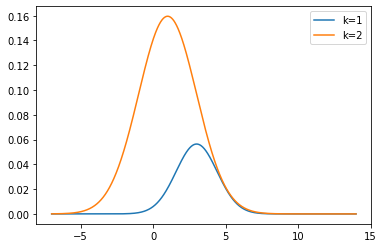

In [28]:
x = np.linspace(-7, 14, 1000)
y1 = norm.pdf(x, loc=mu1, scale=sd1) * p1
y2 = norm.pdf(x, loc=mu2, scale=sd2) * p2

plt.plot(x, y1, label='k=1')
plt.plot(x, y2, label='k=2')
plt.legend();

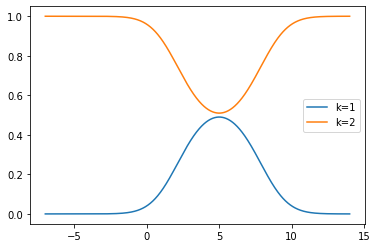

In [29]:
y1_norm = y1 / (y1+y2)
y2_norm = y2 / (y1+y2)

plt.plot(x, y1_norm, label='k=1')
plt.plot(x, y2_norm, label='k=2')
plt.legend();

misclassification error: 20% (it never classifies to cancer, for which the posterior probability is 0.2)

#### What  if P(Y=1) = 0.5?

In [31]:
mu1 = 3
sd1 = sqrt(2)
p1 = 0.5

mu2 = 1
sd2 = sqrt(4)
p2 = 0.5

In [32]:
x = np.linspace(-7, 14, 1000)
y1 = norm.pdf(x, loc=mu1, scale=sd1) * p1
y2 = norm.pdf(x, loc=mu2, scale=sd2) * p2
y1_norm = y1 / (y1+y2)
y2_norm = y2 / (y1+y2)

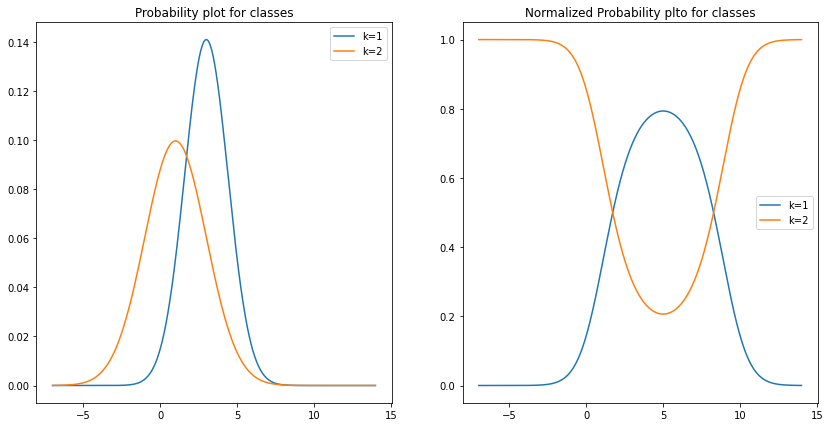

In [39]:
fig, ax = plt.subplots(1,2,figsize=(14,7))

ax[0].plot(x, y1, label='k=1')
ax[0].plot(x, y2, label='k=2')
ax[0].legend()
ax[0].set_title('Probability plot for classes')

ax[1].plot(x, y1_norm, label='k=1')
ax[1].plot(x, y2_norm, label='k=2')
ax[1].legend()
ax[1].set_title('Normalized Probability plto for classes');

## **Exercise 4**
Consider again the model of Exercise 3. Now we change the loss function from misclassification error to a loss function specified by the following matrix

$$L =\begin{bmatrix}
0 & 1000 \\
1 & 0 \end{bmatrix} $$

1. Explain why you may wish to use a more complex loss function than 0-1 loss.
2. Explain how to find a classifier that minimises the expected loss under this new loss function. (Hint:
use the posterior class probabilities from Exercise 3)


#### **Answers**
1. If we want to be sure to catch ALL cancer diagnoses, then we will weight getting those correct higher than getting 'healthy' diagnoses correct - rather more careful than oversight